In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

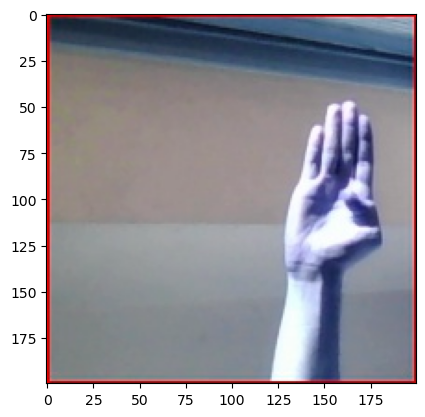

In [2]:
img = cv2.imread('./train/B/B508.jpg')
plt.imshow(img)

**printing the landmark coordinates of 1st image of each class**

x: 0.41225466132164
y: 0.7893108129501343
z: -0.06168952211737633

x: 0.8357716798782349
y: 0.6720361113548279
z: -0.03257700800895691

x: 0.499548077583313
y: 0.6038902997970581
z: -0.011422921903431416

x: 0.626137375831604
y: 0.791057825088501
z: 0.03103758580982685

x: 0.5607575178146362
y: 0.5699355602264404
z: -0.11065243929624557

x: 0.6582194566726685
y: 0.7524966597557068
z: -0.0420951321721077

x: 0.6764851808547974
y: 0.7712879180908203
z: 0.0422172024846077

x: 0.588193953037262
y: 0.7147699594497681
z: -0.06727813929319382

x: 0.7871790528297424
y: 0.6505780816078186
z: -0.06308664381504059

x: 0.6734178066253662
y: 0.8483517169952393
z: -0.06729497760534286

x: 0.6498560905456543
y: 0.697748601436615
z: -0.04385192692279816

x: 0.659354031085968
y: 0.7766017913818359
z: -0.07980898767709732

x: 0.6184015274047852
y: 0.9495993256568909
z: -0.06178714707493782

x: 0.35828882455825806
y: 0.35017433762550354
z: -0.08702993392944336

x: 0.6878743171691895
y: 0.5030484199523926

C:\Users\HP\AppData\Local\Temp\ipykernel_17564\1813276989.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


x: 0.35675251483917236
y: 0.8128461837768555
z: -0.05389318987727165

x: 0.661390483379364
y: 0.6589183211326599
z: -0.045818302780389786

x: 0.3668898642063141
y: 0.5570624470710754
z: -0.05166513845324516

x: 0.7042911052703857
y: 0.5633708238601685
z: -0.027879705652594566

x: 0.4309520721435547
y: 0.6679718494415283
z: -0.0549120269715786



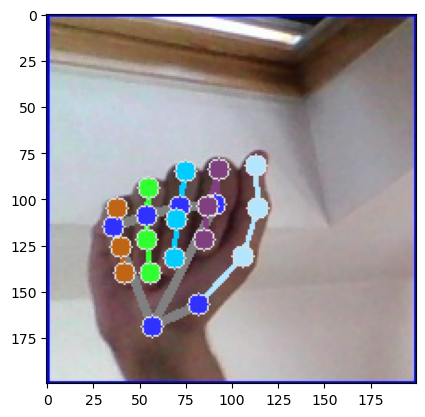

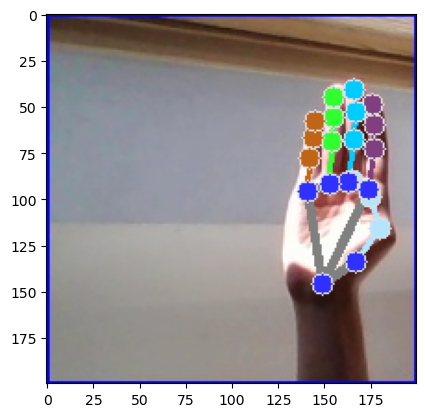

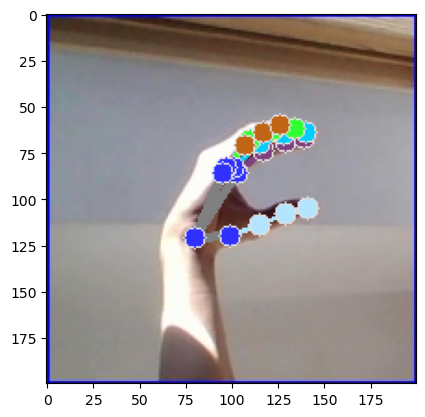

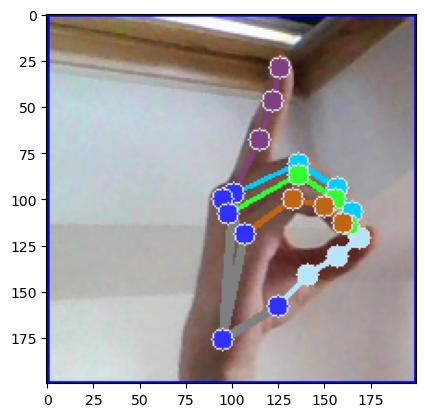

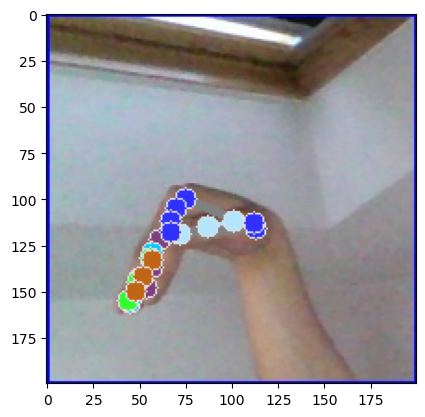

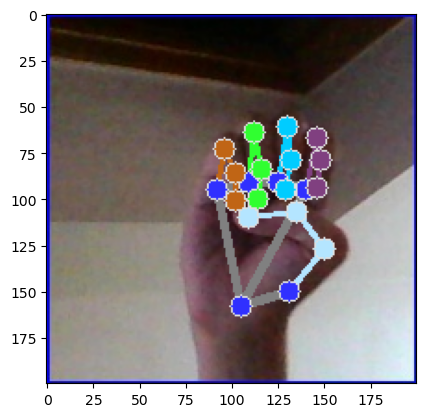

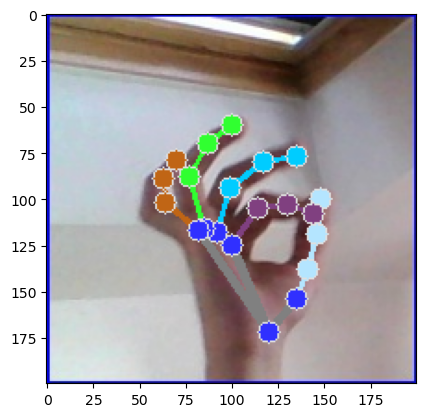

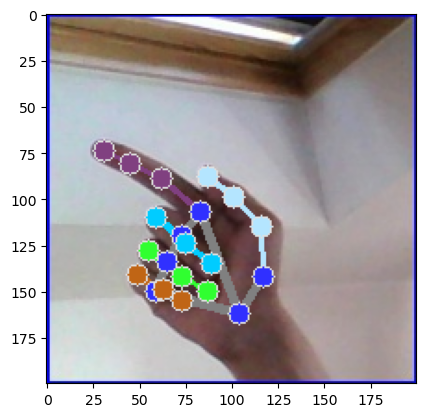

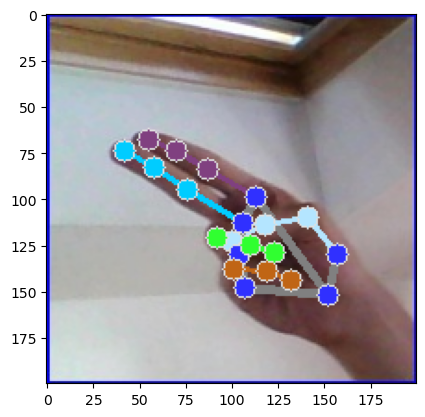

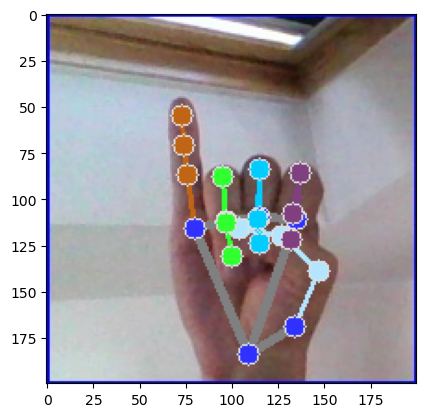

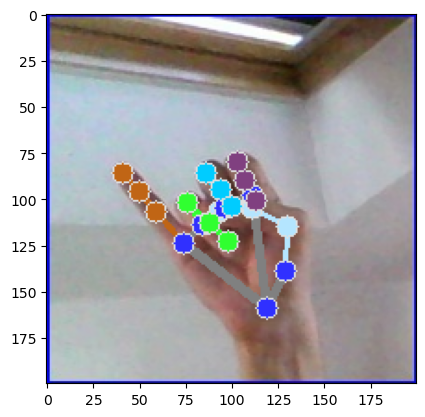

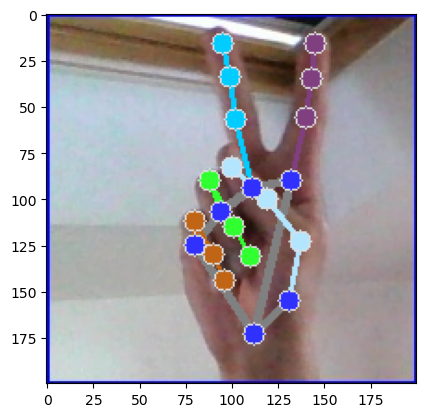

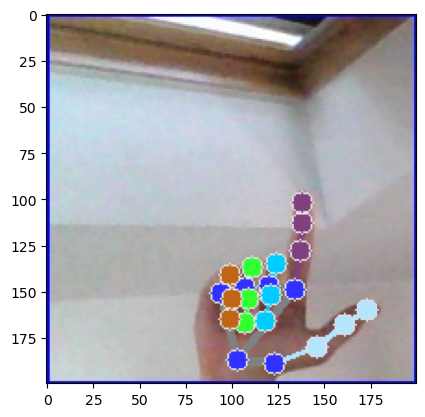

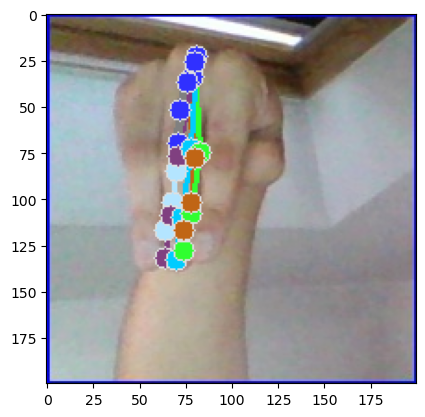

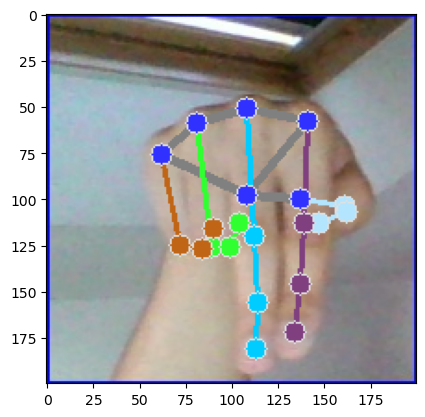

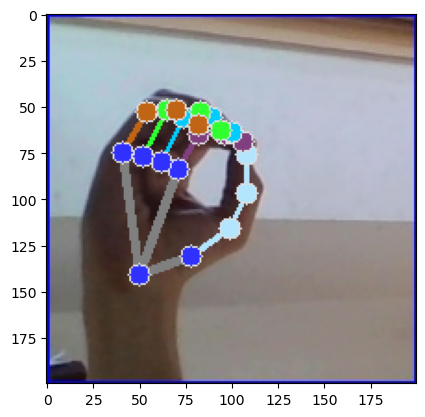

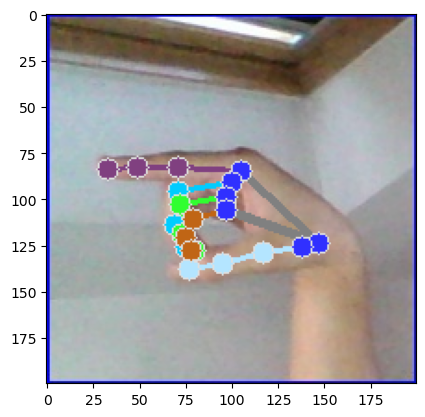

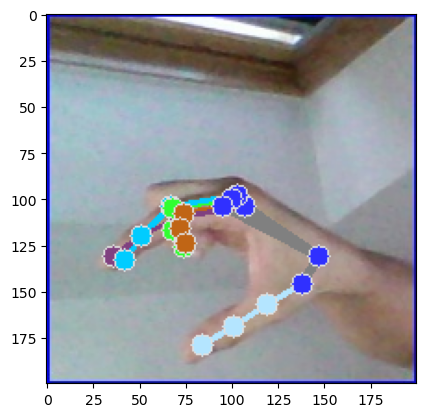

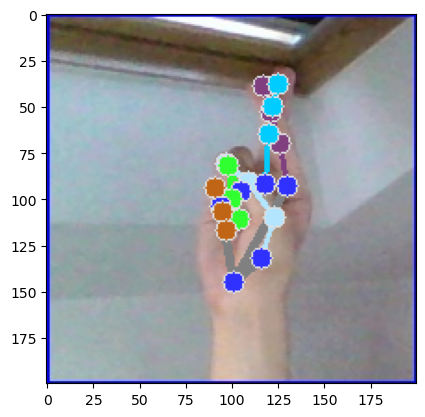

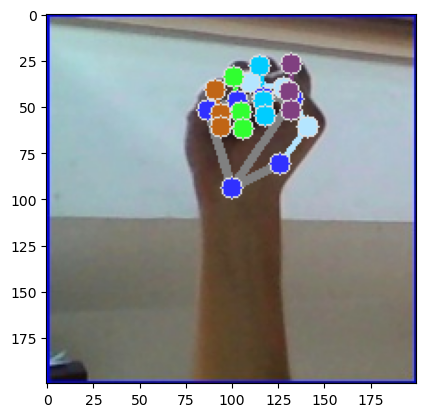

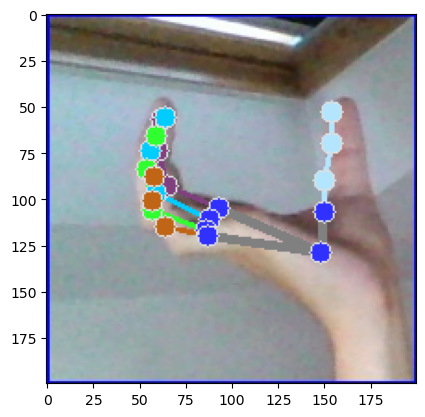

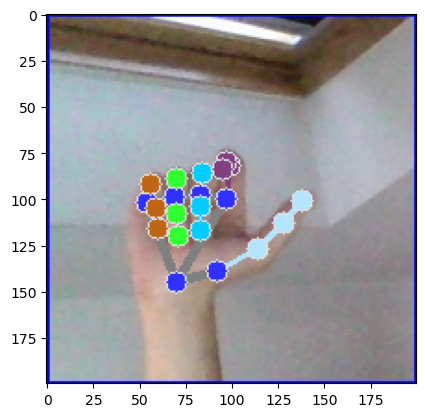

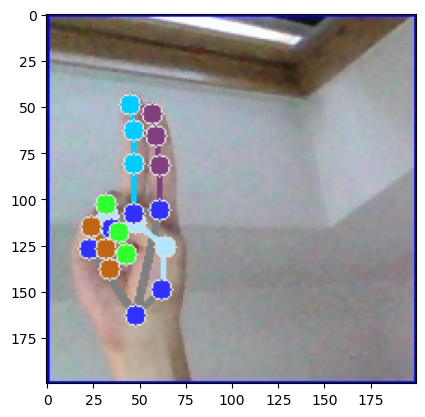

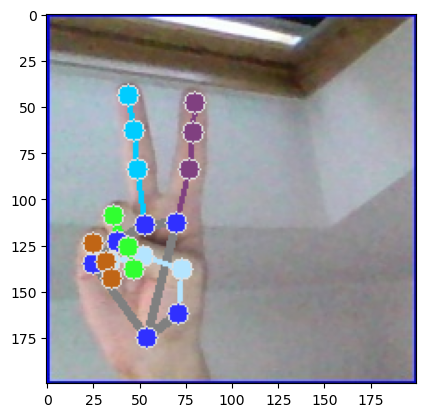

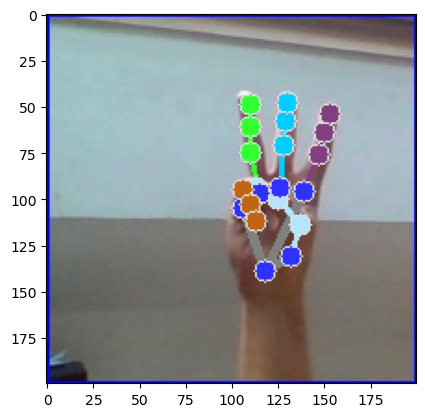

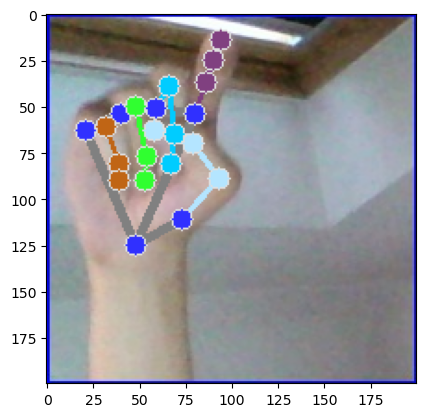

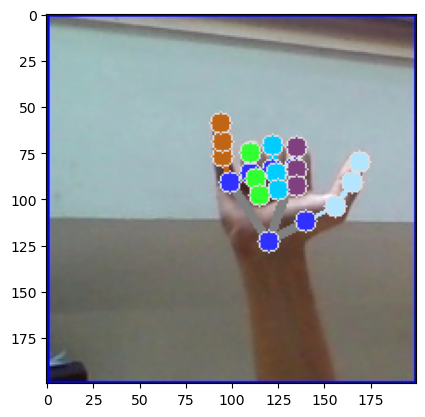

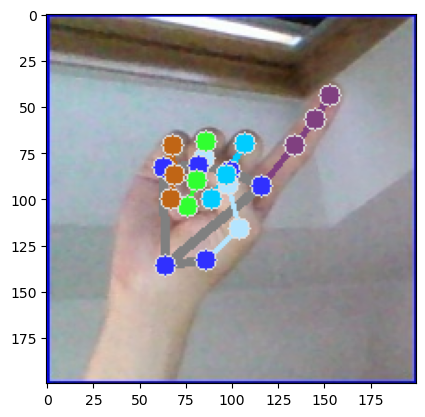

In [4]:
import os
import pickle

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './train'

#data = []
#labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_))[:1]:
       # data_aux = []

        #x_ = []
        #y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                print(hand_landmarks.landmark[1])  # printing the 1st landmark coordinates
                mp_drawing.draw_landmarks(
                img_rgb,hand_landmarks,mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())


        plt.figure()
        plt.imshow(img_rgb)
            
                  

**for identification purpose printing landmarks on all images**

In [6]:
import os
import cv2
import mediapipe as mp

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

DATA_DIR = './train'
OUTPUT_DIR = './sp'  # Directory to save the processed images

# Create output directory if it doesn't exist
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        
        if img is None:
            print(f"Failed to load image: {os.path.join(DATA_DIR, dir_, img_path)}")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style()
                )

        img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

        # Save the processed image
        output_path = os.path.join(OUTPUT_DIR, f'{dir_}_{img_path}')
        cv2.imwrite(output_path, img_bgr)

        # Print success message
        print(f"Successfully processed and saved image: {output_path}")

hands.close()


Successfully processed and saved image: ./sp\A_A1045.jpg
Successfully processed and saved image: ./sp\A_A1046.jpg
Successfully processed and saved image: ./sp\A_A1055.jpg
Successfully processed and saved image: ./sp\A_A1056.jpg
Successfully processed and saved image: ./sp\A_A1057.jpg
Successfully processed and saved image: ./sp\A_A1059.jpg
Successfully processed and saved image: ./sp\A_A1060.jpg
Successfully processed and saved image: ./sp\A_A1062.jpg
Successfully processed and saved image: ./sp\A_A1063.jpg
Successfully processed and saved image: ./sp\A_A1068.jpg
Successfully processed and saved image: ./sp\A_A1069.jpg
Successfully processed and saved image: ./sp\A_A1073.jpg
Successfully processed and saved image: ./sp\A_A1075.jpg
Successfully processed and saved image: ./sp\A_A1076.jpg
Successfully processed and saved image: ./sp\A_A1078.jpg
Successfully processed and saved image: ./sp\A_A1080.jpg
Successfully processed and saved image: ./sp\A_A1081.jpg
Successfully processed and save

Successfully processed and saved image: ./sp\C_C172.jpg
Successfully processed and saved image: ./sp\C_C174.jpg
Successfully processed and saved image: ./sp\C_C175.jpg
Successfully processed and saved image: ./sp\C_C176.jpg
Successfully processed and saved image: ./sp\C_C178.jpg
Successfully processed and saved image: ./sp\C_C179.jpg
Successfully processed and saved image: ./sp\C_C180.jpg
Successfully processed and saved image: ./sp\C_C182.jpg
Successfully processed and saved image: ./sp\C_C183.jpg
Successfully processed and saved image: ./sp\D_D1004.jpg
Successfully processed and saved image: ./sp\D_D1008.jpg
Successfully processed and saved image: ./sp\D_D1009.jpg
Successfully processed and saved image: ./sp\D_D1012.jpg
Successfully processed and saved image: ./sp\D_D1014.jpg
Successfully processed and saved image: ./sp\D_D1015.jpg
Successfully processed and saved image: ./sp\D_D1016.jpg
Successfully processed and saved image: ./sp\D_D1019.jpg
Successfully processed and saved image: 

Successfully processed and saved image: ./sp\del_del1709.jpg
Successfully processed and saved image: ./sp\del_del1710.jpg
Successfully processed and saved image: ./sp\E_E2106.jpg
Successfully processed and saved image: ./sp\E_E2107.jpg
Successfully processed and saved image: ./sp\E_E2108.jpg
Successfully processed and saved image: ./sp\E_E2109.jpg
Successfully processed and saved image: ./sp\E_E2110.jpg
Successfully processed and saved image: ./sp\E_E2111.jpg
Successfully processed and saved image: ./sp\E_E2112.jpg
Successfully processed and saved image: ./sp\E_E2113.jpg
Successfully processed and saved image: ./sp\E_E2114.jpg
Successfully processed and saved image: ./sp\E_E2115.jpg
Successfully processed and saved image: ./sp\E_E2116.jpg
Successfully processed and saved image: ./sp\E_E2117.jpg
Successfully processed and saved image: ./sp\E_E2118.jpg
Successfully processed and saved image: ./sp\E_E2120.jpg
Successfully processed and saved image: ./sp\E_E2122.jpg
Successfully processed 

Successfully processed and saved image: ./sp\G_G1608.jpg
Successfully processed and saved image: ./sp\G_G1610.jpg
Successfully processed and saved image: ./sp\G_G1611.jpg
Successfully processed and saved image: ./sp\G_G1612.jpg
Successfully processed and saved image: ./sp\G_G1615.jpg
Successfully processed and saved image: ./sp\G_G1616.jpg
Successfully processed and saved image: ./sp\G_G1618.jpg
Successfully processed and saved image: ./sp\G_G1619.jpg
Successfully processed and saved image: ./sp\G_G1620.jpg
Successfully processed and saved image: ./sp\G_G1621.jpg
Successfully processed and saved image: ./sp\G_G1622.jpg
Successfully processed and saved image: ./sp\G_G1624.jpg
Successfully processed and saved image: ./sp\G_G1625.jpg
Successfully processed and saved image: ./sp\G_G1627.jpg
Successfully processed and saved image: ./sp\G_G1628.jpg
Successfully processed and saved image: ./sp\G_G1630.jpg
Successfully processed and saved image: ./sp\G_G1631.jpg
Successfully processed and save

Successfully processed and saved image: ./sp\I_I1922.jpg
Successfully processed and saved image: ./sp\I_I1923.jpg
Successfully processed and saved image: ./sp\I_I1924.jpg
Successfully processed and saved image: ./sp\I_I1925.jpg
Successfully processed and saved image: ./sp\I_I1926.jpg
Successfully processed and saved image: ./sp\I_I1927.jpg
Successfully processed and saved image: ./sp\I_I1930.jpg
Successfully processed and saved image: ./sp\J_J1482.jpg
Successfully processed and saved image: ./sp\J_J1484.jpg
Successfully processed and saved image: ./sp\J_J1485.jpg
Successfully processed and saved image: ./sp\J_J1486.jpg
Successfully processed and saved image: ./sp\J_J1488.jpg
Successfully processed and saved image: ./sp\J_J1491.jpg
Successfully processed and saved image: ./sp\J_J1492.jpg
Successfully processed and saved image: ./sp\J_J1493.jpg
Successfully processed and saved image: ./sp\J_J1495.jpg
Successfully processed and saved image: ./sp\J_J1498.jpg
Successfully processed and save

Successfully processed and saved image: ./sp\L_L1871.jpg
Successfully processed and saved image: ./sp\L_L1872.jpg
Successfully processed and saved image: ./sp\L_L1877.jpg
Successfully processed and saved image: ./sp\L_L1878.jpg
Successfully processed and saved image: ./sp\L_L1880.jpg
Successfully processed and saved image: ./sp\L_L1881.jpg
Successfully processed and saved image: ./sp\L_L1882.jpg
Successfully processed and saved image: ./sp\L_L1883.jpg
Successfully processed and saved image: ./sp\L_L1885.jpg
Successfully processed and saved image: ./sp\L_L1886.jpg
Successfully processed and saved image: ./sp\L_L1887.jpg
Successfully processed and saved image: ./sp\L_L1888.jpg
Successfully processed and saved image: ./sp\L_L1891.jpg
Successfully processed and saved image: ./sp\L_L1893.jpg
Successfully processed and saved image: ./sp\L_L1894.jpg
Successfully processed and saved image: ./sp\L_L1896.jpg
Successfully processed and saved image: ./sp\L_L1897.jpg
Successfully processed and save

Successfully processed and saved image: ./sp\N_N1243.jpg
Successfully processed and saved image: ./sp\O_O393.jpg
Successfully processed and saved image: ./sp\O_O395.jpg
Successfully processed and saved image: ./sp\O_O397.jpg
Successfully processed and saved image: ./sp\O_O398.jpg
Successfully processed and saved image: ./sp\O_O400.jpg
Successfully processed and saved image: ./sp\O_O402.jpg
Successfully processed and saved image: ./sp\O_O405.jpg
Successfully processed and saved image: ./sp\O_O406.jpg
Successfully processed and saved image: ./sp\O_O408.jpg
Successfully processed and saved image: ./sp\O_O409.jpg
Successfully processed and saved image: ./sp\O_O412.jpg
Successfully processed and saved image: ./sp\O_O418.jpg
Successfully processed and saved image: ./sp\O_O421.jpg
Successfully processed and saved image: ./sp\O_O423.jpg
Successfully processed and saved image: ./sp\O_O426.jpg
Successfully processed and saved image: ./sp\O_O427.jpg
Successfully processed and saved image: ./sp\O_

Successfully processed and saved image: ./sp\Q_Q1091.jpg
Successfully processed and saved image: ./sp\Q_Q1092.jpg
Successfully processed and saved image: ./sp\Q_Q1093.jpg
Successfully processed and saved image: ./sp\Q_Q1094.jpg
Successfully processed and saved image: ./sp\Q_Q1097.jpg
Successfully processed and saved image: ./sp\Q_Q1098.jpg
Successfully processed and saved image: ./sp\Q_Q1099.jpg
Successfully processed and saved image: ./sp\Q_Q1100.jpg
Successfully processed and saved image: ./sp\Q_Q1103.jpg
Successfully processed and saved image: ./sp\Q_Q1104.jpg
Successfully processed and saved image: ./sp\Q_Q1105.jpg
Successfully processed and saved image: ./sp\Q_Q1106.jpg
Successfully processed and saved image: ./sp\Q_Q1107.jpg
Successfully processed and saved image: ./sp\Q_Q1108.jpg
Successfully processed and saved image: ./sp\Q_Q1109.jpg
Successfully processed and saved image: ./sp\Q_Q1110.jpg
Successfully processed and saved image: ./sp\Q_Q1111.jpg
Successfully processed and save

Successfully processed and saved image: ./sp\S_S496.jpg
Successfully processed and saved image: ./sp\S_S497.jpg
Successfully processed and saved image: ./sp\S_S498.jpg
Successfully processed and saved image: ./sp\S_S503.jpg
Successfully processed and saved image: ./sp\S_S504.jpg
Successfully processed and saved image: ./sp\S_S505.jpg
Successfully processed and saved image: ./sp\S_S506.jpg
Successfully processed and saved image: ./sp\S_S508.jpg
Successfully processed and saved image: ./sp\S_S509.jpg
Successfully processed and saved image: ./sp\S_S510.jpg
Successfully processed and saved image: ./sp\S_S512.jpg
Successfully processed and saved image: ./sp\S_S516.jpg
Successfully processed and saved image: ./sp\S_S517.jpg
Successfully processed and saved image: ./sp\S_S518.jpg
Successfully processed and saved image: ./sp\S_S519.jpg
Successfully processed and saved image: ./sp\S_S520.jpg
Successfully processed and saved image: ./sp\space_space1585.jpg
Successfully processed and saved image:

Successfully processed and saved image: ./sp\T_T895.jpg
Successfully processed and saved image: ./sp\T_T896.jpg
Successfully processed and saved image: ./sp\T_T898.jpg
Successfully processed and saved image: ./sp\T_T899.jpg
Successfully processed and saved image: ./sp\T_T900.jpg
Successfully processed and saved image: ./sp\T_T901.jpg
Successfully processed and saved image: ./sp\T_T902.jpg
Successfully processed and saved image: ./sp\T_T904.jpg
Successfully processed and saved image: ./sp\T_T905.jpg
Successfully processed and saved image: ./sp\T_T906.jpg
Successfully processed and saved image: ./sp\T_T908.jpg
Successfully processed and saved image: ./sp\T_T910.jpg
Successfully processed and saved image: ./sp\U_U1001.jpg
Successfully processed and saved image: ./sp\U_U1002.jpg
Successfully processed and saved image: ./sp\U_U1003.jpg
Successfully processed and saved image: ./sp\U_U1004.jpg
Successfully processed and saved image: ./sp\U_U1005.jpg
Successfully processed and saved image: ./s

Successfully processed and saved image: ./sp\W_W753.jpg
Successfully processed and saved image: ./sp\W_W755.jpg
Successfully processed and saved image: ./sp\W_W756.jpg
Successfully processed and saved image: ./sp\W_W757.jpg
Successfully processed and saved image: ./sp\W_W758.jpg
Successfully processed and saved image: ./sp\W_W759.jpg
Successfully processed and saved image: ./sp\W_W760.jpg
Successfully processed and saved image: ./sp\W_W762.jpg
Successfully processed and saved image: ./sp\W_W763.jpg
Successfully processed and saved image: ./sp\W_W764.jpg
Successfully processed and saved image: ./sp\W_W765.jpg
Successfully processed and saved image: ./sp\W_W768.jpg
Successfully processed and saved image: ./sp\W_W769.jpg
Successfully processed and saved image: ./sp\W_W772.jpg
Successfully processed and saved image: ./sp\W_W773.jpg
Successfully processed and saved image: ./sp\W_W775.jpg
Successfully processed and saved image: ./sp\W_W776.jpg
Successfully processed and saved image: ./sp\W_W

Successfully processed and saved image: ./sp\Z_Z1032.jpg
Successfully processed and saved image: ./sp\Z_Z1034.jpg
Successfully processed and saved image: ./sp\Z_Z1036.jpg
Successfully processed and saved image: ./sp\Z_Z1038.jpg
Successfully processed and saved image: ./sp\Z_Z1040.jpg
Successfully processed and saved image: ./sp\Z_Z1042.jpg
Successfully processed and saved image: ./sp\Z_Z1045.jpg
Successfully processed and saved image: ./sp\Z_Z1046.jpg
Successfully processed and saved image: ./sp\Z_Z1049.jpg
Successfully processed and saved image: ./sp\Z_Z1050.jpg
Successfully processed and saved image: ./sp\Z_Z1052.jpg
Successfully processed and saved image: ./sp\Z_Z1054.jpg
Successfully processed and saved image: ./sp\Z_Z1055.jpg
Successfully processed and saved image: ./sp\Z_Z1058.jpg
Successfully processed and saved image: ./sp\Z_Z1059.jpg
Successfully processed and saved image: ./sp\Z_Z1062.jpg
Successfully processed and saved image: ./sp\Z_Z1064.jpg
Successfully processed and save

**save this coordinate data of landmark to pickle file**

In [11]:
import os
import pickle

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

DATA_DIR = './train'

data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)

f = open('sample_data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

**load data**

In [12]:
import pickle
data_dict = pickle.load(open('./sample_data.pickle','rb'))
print(data_dict.keys())
print(data_dict)

dict_keys(['data', 'labels'])
{'data': [[0.10195352137088776, 0.43890005350112915, 0.22813062369823456, 0.3825932741165161, 0.34870745241642, 0.24958813190460205, 0.38642628490924835, 0.11786156892776489, 0.3868871480226517, 0.0, 0.2713198810815811, 0.11278218030929565, 0.2839062362909317, 0.015587151050567627, 0.25375165045261383, 0.11418116092681885, 0.24030150473117828, 0.2060009241104126, 0.17847897112369537, 0.11713194847106934, 0.19135521352291107, 0.020733684301376343, 0.16654245555400848, 0.15035134553909302, 0.16267700493335724, 0.25275635719299316, 0.08950175344944, 0.13803917169570923, 0.09414811432361603, 0.0667429268360138, 0.08797110617160797, 0.2028353214263916, 0.09736652672290802, 0.29324400424957275, 0.0, 0.17106223106384277, 0.009054586291313171, 0.11818033456802368, 0.015748322010040283, 0.22267287969589233, 0.0296037495136261, 0.29217374324798584], [0.09673763811588287, 0.44831645488739014, 0.22893233597278595, 0.386211633682251, 0.3461945503950119, 0.2531452775001

**train model**

In [13]:
import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data_dict = pickle.load(open('./sample_data.pickle', 'rb'))

data = data_dict['data']
labels = data_dict['labels']

# Determine the maximum length of the sequences
max_length = max(len(d) for d in data)

# Pad or truncate the data elements to have the same length
def pad_or_truncate(seq, max_len):
    if len(seq) < max_len:
        return np.pad(seq, (0, max_len - len(seq)), 'constant')
    else:
        return seq[:max_len]

# Apply the padding/truncating function to all data elements
data = np.array([pad_or_truncate(d, max_length) for d in data])

# Convert labels to numpy array
labels = np.asarray(labels)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# Train the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Predict and evaluate
y_predict = model.predict(x_test)
score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly!'.format(score * 100))


99.38461538461539% of samples were classified correctly!


In [14]:
f = open('sample_model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()